### Overlaying published DC2 subclusters

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [32]:
# read in data
data = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [33]:
data

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

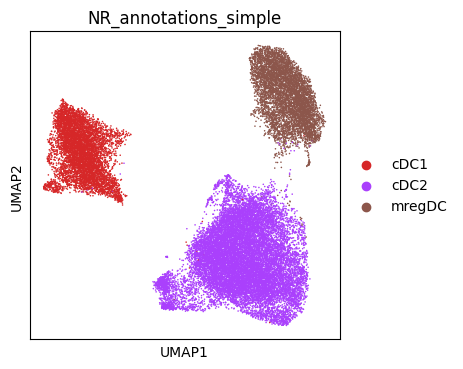

In [34]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=["NR_annotations_simple"], ncols=1, size=5)

### Guimaraes DC2 clusters:
* DC2_FCER1A: CD1C, FCER1A, CLEC10A 
* DC2_AREG: AREG
* DC2_CCD207: CD207, CD1A
* DC3_CD14: CD14, S100A9, S100A8, VCAN, LYZ
* DC4_FCGR3A: FCGR3A, FTL, SERPINA1
* DC_CXCL8: CXCL8, CXCL2

In [ ]:
#define DC subset gene sets from Guimaraes et al
DC2_FCER1A = ['CD1C', 'FCER1A', 'CLEC10A']
DC2_AREG = ['AREG']
DC2_CD207 = ['CD207','CD1A']
DC3_CD14 = ['CD14', 'S100A9', 'S100A8', 'VCAN', 'LYZ']
DC4_FCGR3A = ['FCGR3A', 'FTL', 'SERPINA1']
DC_CXCL8 = ['CXCL8','CXCL2']

In [71]:
# Define dictionary of gene sets
gene_sets_G = {
    "DC2_FCER1A_sig": DC2_FCER1A,
    "DC2_AREG_sig": DC2_AREG,
    "DC2_CD207_sig": DC2_CD207,
    "DC3_CD14_sig": DC3_CD14,
    "DC4_FCGR3A_sig": DC4_FCGR3A,
    "DC_CXCL8_sig": DC_CXCL8
}

In [72]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets_G.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [73]:
colour_vars = ["DC2_FCER1A_sig","DC2_AREG_sig","DC2_CD207_sig","DC3_CD14_sig","DC4_FCGR3A_sig","DC_CXCL8_sig","NR_annotations_simple"]

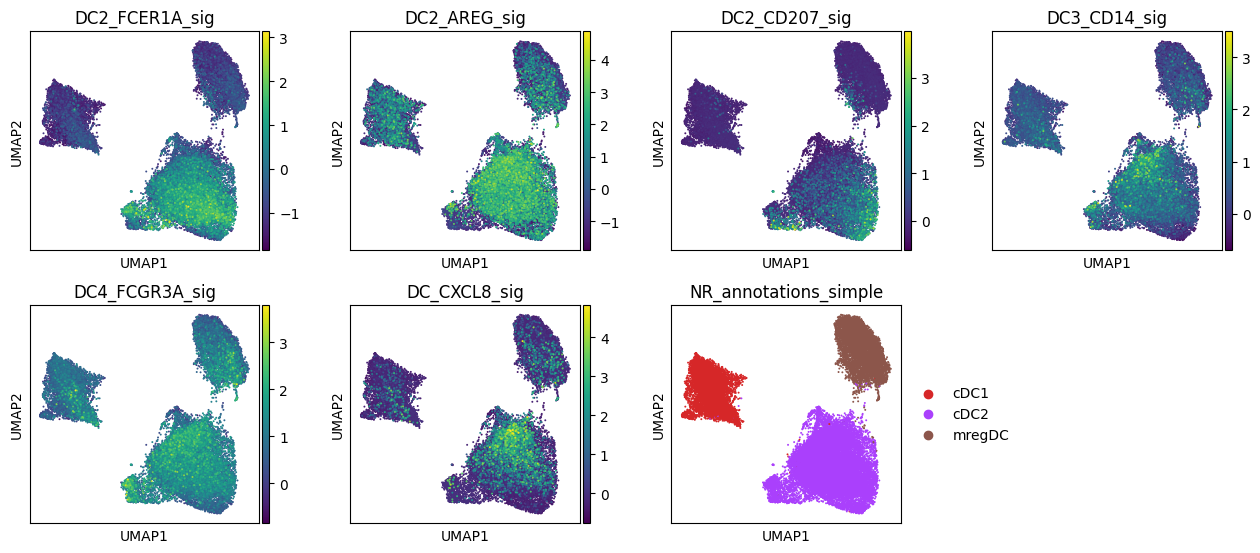

In [74]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=8)

### ^ Note no CXCL8, so DC_CXCL8 sig is just CXCL2 expression

### Cheng DC2 clusters:
* DC2_CXCR4 --> CXCR4
* DC2_CD1A --> CD1A, CD207
* DC2_IL1B --> CD163, CD14, IL1B, TNF, CCL3, CCL4
* DC2_FCN1 --> CD163, CD14, FCN1
* DC2_ISG15 --> ISG15, IFIT6, IFIT1
* DC2_CXCL9 --> CXCL9

In [ ]:
#define DC subset gene sets from Cheng et al
DC2_CXCR4 = ['CXCR4']
DC2_CD1A = ['CD1A','CD207']
DC2_IL1B = ['CD163','CD14','IL1B','TNF','CCL3','CCL4']
DC2_FCN1 = ['CD163', 'CD14', 'FCN1']
DC2_ISG15 = ['ISG15', 'IFIT6', 'IFIT1']
DC2_CXCL9 = ['CXCL9']

In [76]:
# Define dictionary of gene sets
gene_sets_C = {
    "DC2_CXCR4_sig": DC2_CXCR4,
    "DC2_CD1A_sig": DC2_CD1A,
    "DC2_IL1B_sig": DC2_IL1B,
    "DC2_FCN1_sig": DC2_FCN1,
    "DC2_ISG15_sig": DC2_ISG15,
    "DC2_CXCL9_sig": DC2_CXCL9
}

In [77]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets_C.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [78]:
colour_vars = ["DC2_CXCR4_sig","DC2_CD1A_sig","DC2_IL1B_sig","DC2_FCN1_sig","DC2_ISG15_sig","DC2_CXCL9_sig","NR_annotations_simple"]

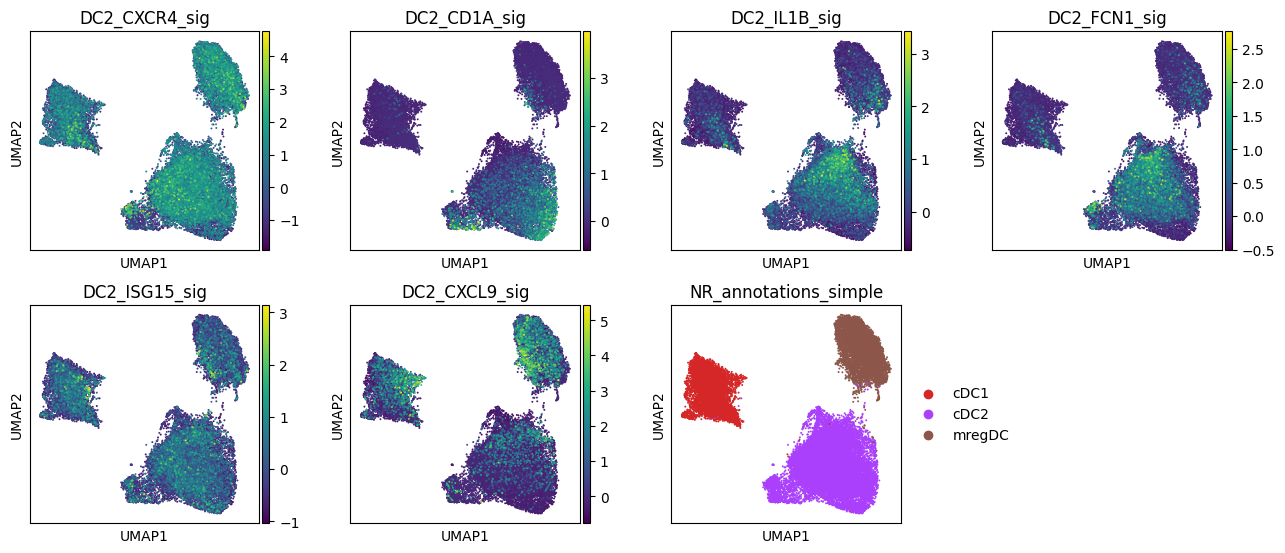

In [79]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=8)

### Subclustering DC2 and then seeing if any of the published signatures fall all within one cluster:

In [35]:
# subcluster DC2 
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.2, key_added='2025-DC2-subcluster_02')
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.5, key_added='2025-DC2-subcluster_05')
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.8, key_added='2025-DC2-subcluster_08')
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=1, key_added='2025-DC2-subcluster_10')

In [38]:
colour_vars = ['2025-DC2-subcluster_02', '2025-DC2-subcluster_05', '2025-DC2-subcluster_08']

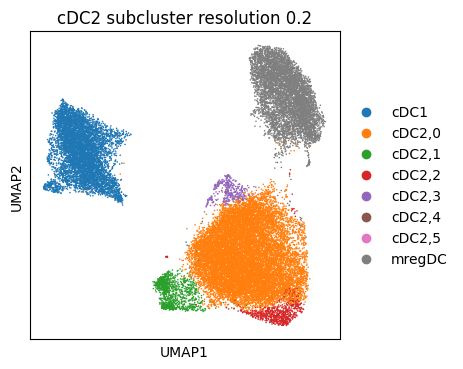

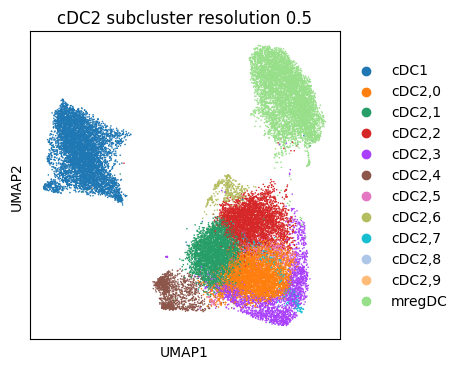

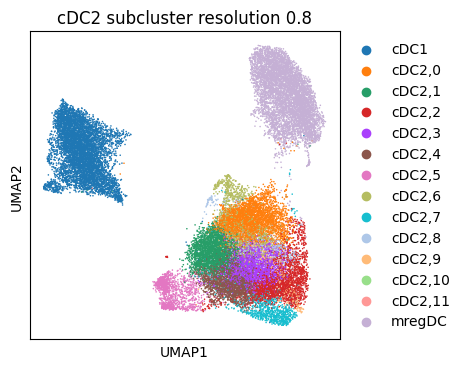

In [107]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=["2025-DC2-subcluster_02"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.2")
    sc.pl.umap(data, color=["2025-DC2-subcluster_05"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.5")
    sc.pl.umap(data, color=["2025-DC2-subcluster_08"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.8")

In [141]:
#output the number of cells in each cluster
data.obs["2025-DC2-subcluster_02"].value_counts()

2025-DC2-subcluster_02
cDC2,0    15057
cDC1       6730
mregDC     6120
cDC2,1     1174
cDC2,2      757
cDC2,3      401
cDC2,4        1
cDC2,5        1
Name: count, dtype: int64

In [142]:
data.obs["2025-DC2-subcluster_05"].value_counts()

2025-DC2-subcluster_05
cDC1      6730
mregDC    6120
cDC2,0    4900
cDC2,1    3921
cDC2,2    3913
cDC2,3    2259
cDC2,4    1232
cDC2,5     492
cDC2,6     408
cDC2,7     264
cDC2,8       1
cDC2,9       1
Name: count, dtype: int64

In [143]:
data.obs["2025-DC2-subcluster_08"].value_counts()

2025-DC2-subcluster_08
cDC1       6730
mregDC     6120
cDC2,0     3330
cDC2,1     2703
cDC2,2     2431
cDC2,3     2406
cDC2,4     2275
cDC2,5     1211
cDC2,6     1190
cDC2,7      942
cDC2,8      619
cDC2,9      282
cDC2,10       1
cDC2,11       1
Name: count, dtype: int64

## Make graph --> how much does each gene signature fall within one cluster:

In [119]:
#re-define DC subset gene sets from Guimaraes et al and Cheng et al
DC2_FCER1A = ['CD1C', 'FCER1A', 'CLEC10A']
DC2_AREG = ['AREG']
DC2_CD207 = ['CD207','CD1A'] #same as DC2_CD1A in Cheng et al
DC3_CD14 = ['CD14', 'S100A9', 'S100A8', 'VCAN', 'LYZ']
DC4_FCGR3A = ['FCGR3A', 'FTL', 'SERPINA1']
DC_CXCL8 = ['CXCL2'] #CXCL8 removed as not in atlas

DC2_CXCR4 = ['CXCR4']
DC2_IL1B = ['CD163','CD14','IL1B','TNF','CCL3','CCL4']
DC2_FCN1 = ['CD163', 'CD14', 'FCN1']
DC2_ISG15 = ['ISG15', 'IFIT1'] #IFIT6 removed as not in atlas
DC2_CXCL9 = ['CXCL9']

In [120]:
gene_sets_all = {
    "Guimaraes_DC2_FCER1A": DC2_FCER1A,
    "Guimaraes_DC2_AREG": DC2_AREG,
    "Guimaraes_Cheng_DC2_CD207/CD1A": DC2_CD207,
    "Guimaraes_DC3_CD14": DC3_CD14,
    "Guimaraes_DC4_FCGR3A": DC4_FCGR3A,
    "Guimaraes_DC_CXCL8": DC_CXCL8,
    "Cheng_DC2_CXCR4": DC2_CXCR4,
    "Cheng_DC2_IL1B": DC2_IL1B,
    "Cheng_DC2_FCN1": DC2_FCN1,
    "Cheng_DC2_ISG15": DC2_ISG15,
    "Cheng_DC2_CXCL9": DC2_CXCL9
}

In [144]:
#exclude cluster 10 and 11 from plot as only 1 cell allocated to each
data_sub = data[~data.obs['2025-DC2-subcluster_08'].isin(['cDC2,10', 'cDC2,11'])]

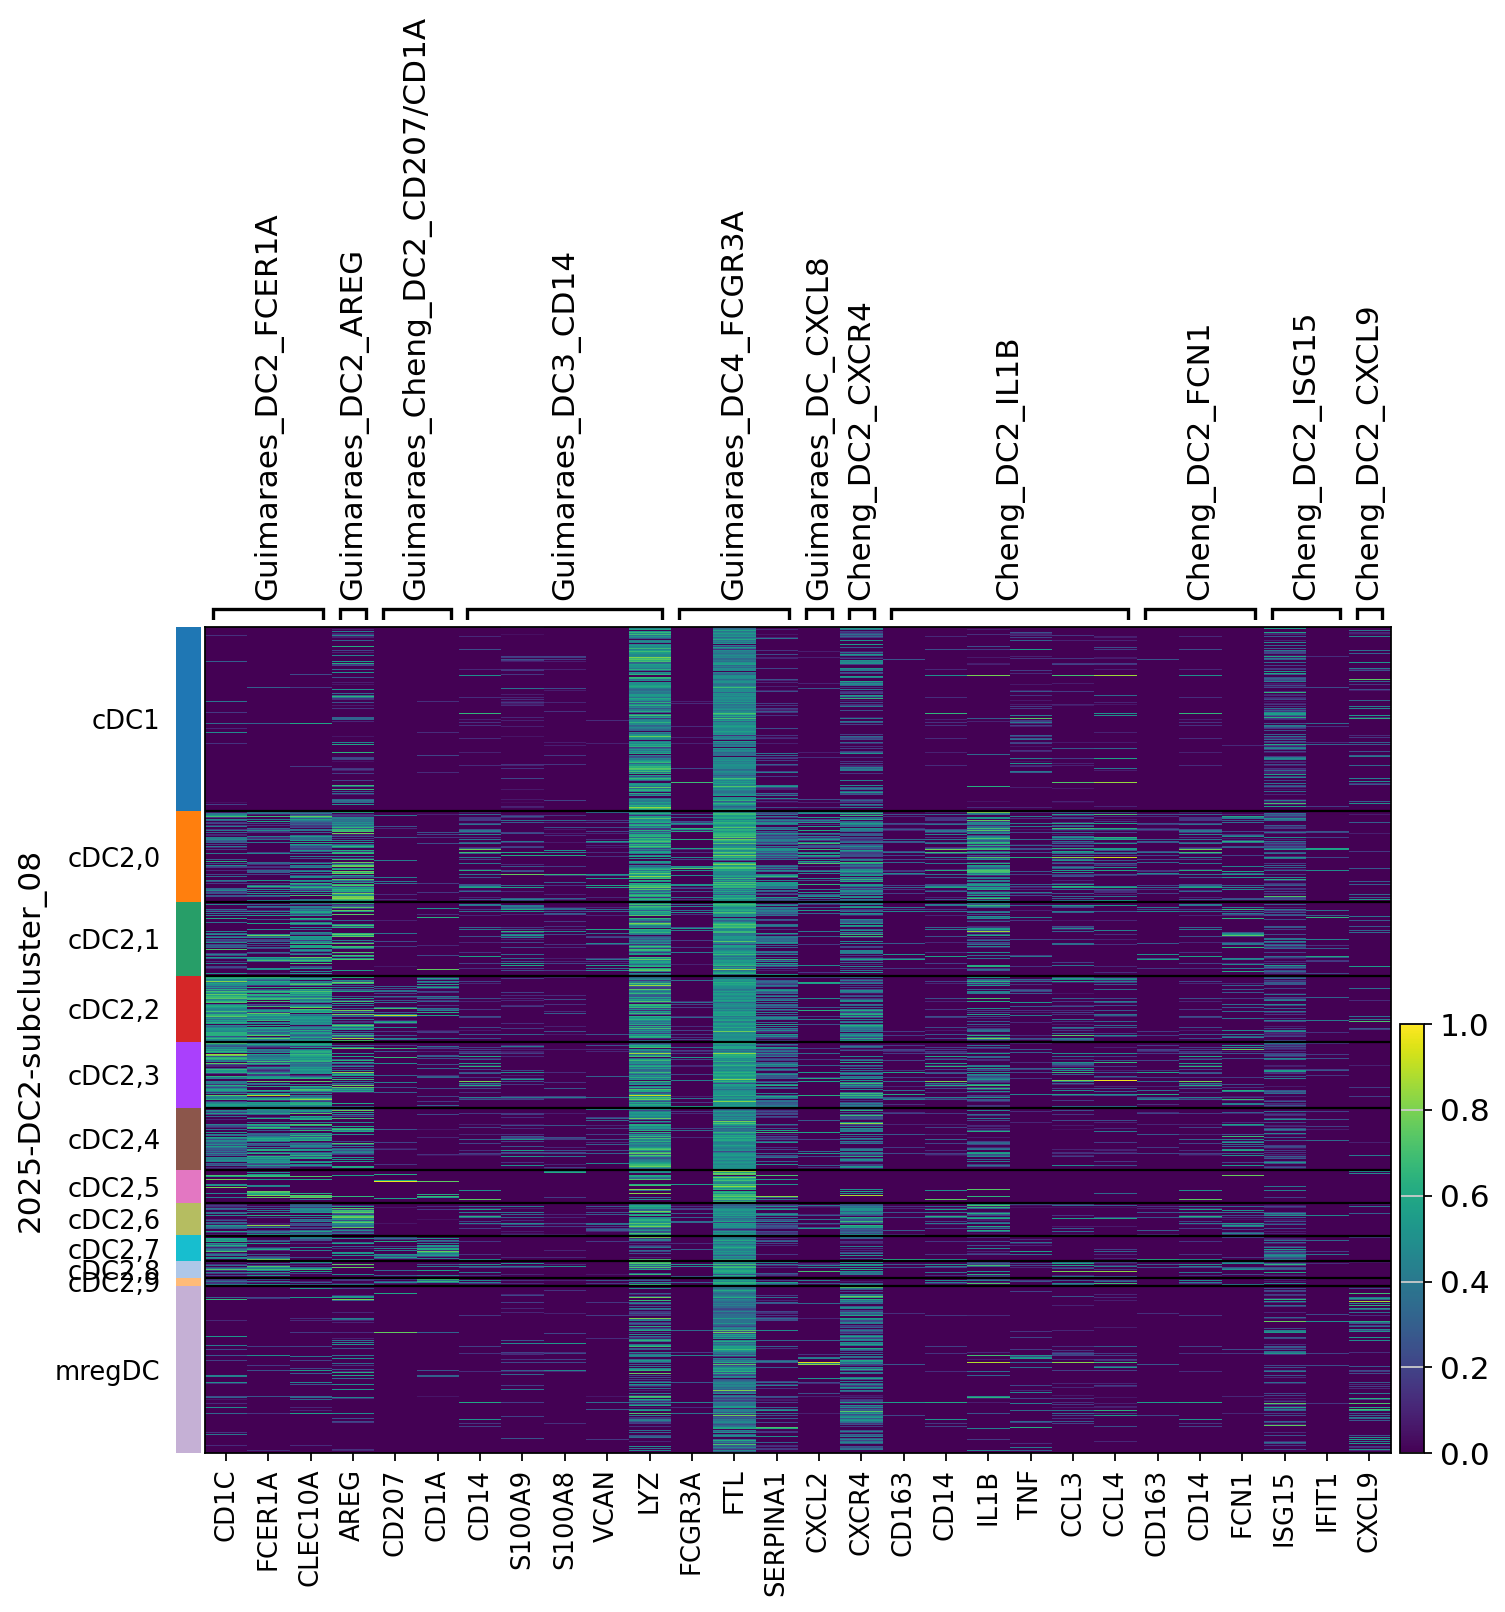

In [157]:
sc.pl.heatmap(data_sub, gene_sets_all, groupby="2025-DC2-subcluster_08", standard_scale="var", figsize=(10,7), save="_DC2_clusters.svg")

In [ ]:
sc.set_figure_params(dpi=80, dpi_save=700, vector_friendly=True, format='svg')

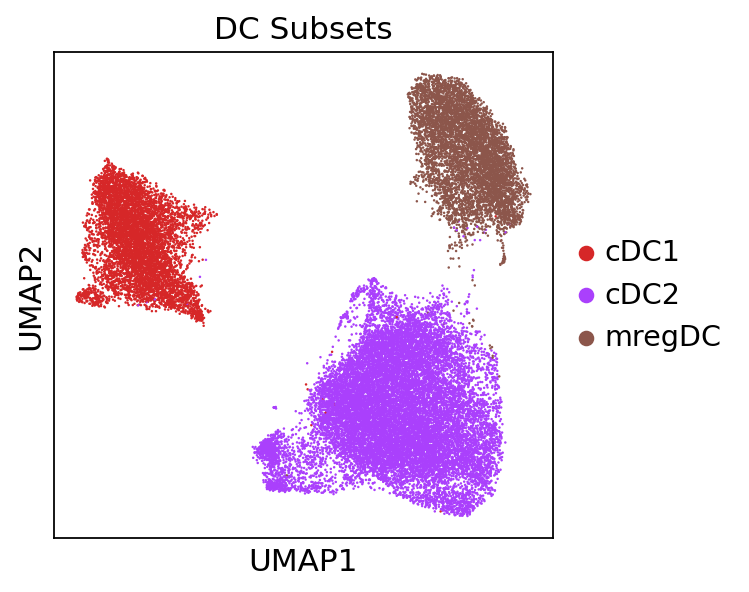

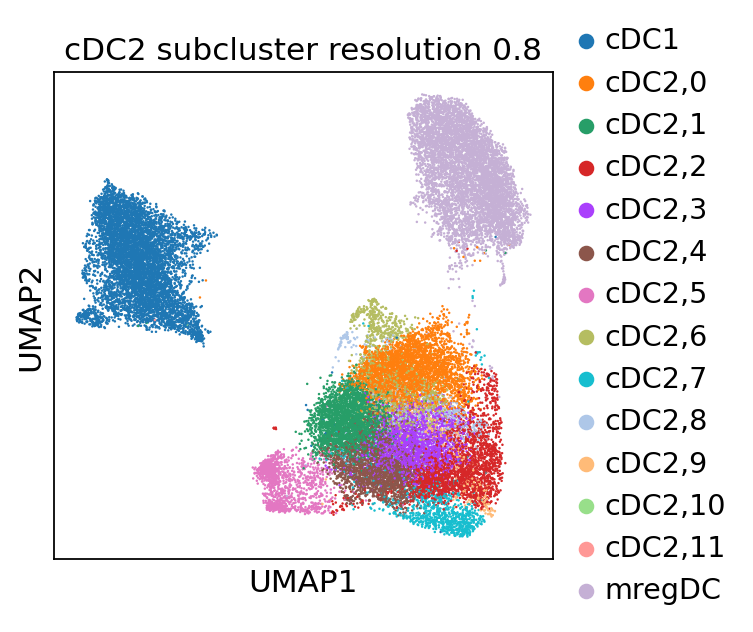

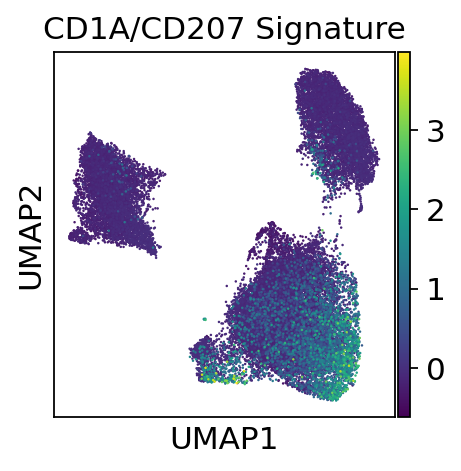

In [155]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=["NR_annotations_simple"], ncols = 1, size=5, title="DC Subsets", save="_DC_UMAP.svg")
    sc.pl.umap(data, color=["2025-DC2-subcluster_08"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.8", save="_DC2_sub_08.svg")
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=["DC2_CD1A_sig"], ncols = 1, size=5, title="CD1A/CD207 Signature", save="_DC2_CD1Asig.svg")